<a href="https://colab.research.google.com/github/q890003/ML_Fully-Bayesian/blob/master/ML_hw3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import product
#Fully Bayesian

n, a , b = 4, 1, 1          #for test
w = np.array([1,2,3,4]).T   #for test
# n = int(input("n="))
# a = float(input("a="))
# b = float(input("b="))
# w_t = np.array([float(i) for i in input("initial Weight.(1.combination of number and whitespace. 2.dim should be same as n.)").split()])

#prior init
prior_var = np.zeros((n,n), dtype=float)
for i in range(n):
    prior_var[i][i] = 1/b
prior_mean = np.zeros((n,1), dtype=float)
#posterior init (no need)

#Training
#collecting
train_x, train_y = [], []
ten_x  , ten_y   = [], []
fifty_x, fifty_y = [], []
num = 0
while True:
    num += 1
    # y = X dot w + e, e~N(0,a) a Gaussian noise 
    U = np.random.uniform(0,1)     
    V = np.random.uniform(0,1) 
    x_rand = np.random.uniform(-1,1)
    x = np.array([x_rand**i for i in range(0,n)]).reshape(1,n)
    x_t = x.reshape(n,1)
    e = (-2*math.log(U))**(-1/2) * math.cos(2*math.pi*V) * a**(1/2)
    y = x.dot(w) + e
    train_x.append(x_rand)
    train_y.append(y[0])
    #posterior update
    S = np.linalg.inv(prior_var)
    posterior_var = np.linalg.inv(a * x_t.dot(x) + S)
    posterior_mean = posterior_var.dot(a * x_t.dot(y).reshape(n,1) +  S.dot(prior_mean))

    #predictive distribution
    predictive_mean = x.dot(prior_mean)
    predictive_var = 1/a + x.dot(prior_var).dot(x_t)

    #convergence check
    mean_convergence_check = np.absolute(posterior_mean - prior_mean)
    mean_convergence_check = np.all(np.less(mean_convergence_check,[0.0001]))
    var_convergence_check = np.absolute(posterior_var - prior_var)
    var_convergence_check = np.all(np.less(var_convergence_check,[0.0001]))

    #prior update
    prior_var, prior_mean = posterior_var, posterior_mean
    
    print("Add data point ({x:.5f},{y:.5f}):\n".format(x= x_rand, y= y[0]))
    print("Posterior mean:")
    for i in range(n):
        print("\t{mean:.10f}".format(mean= posterior_mean[i][0]))
        if i == n-1:
            print()
    print("Posterior variance:")
    for (i,j) in product(range(n),range(n)):
        print("\t{var:.10f}".format(var= posterior_var[i][j]), end='')
        if j < n-1:
            print(",", end='')
        else:
            print()
    print()
    print("Predictive distribution ~ N({mean:.10f}, {var:.10f})".format(mean= predictive_mean[0][0], var=predictive_var[0][0]))
    print("--------------------------------------------------")
    if num  < 10 :
        ten_x.append(x_rand)
        ten_y.append(y[0])
    if num == 9:
        ten_mean = posterior_mean
        ten_var = posterior_var
    if num < 50 :
        fifty_x.append(x_rand)
        fifty_y.append(y)
    if num == 49:
        fifty_mean = posterior_mean
        fifty_var = posterior_var

    if mean_convergence_check and var_convergence_check:
        break


Streaming output truncated to the last 5000 lines.
	0.0038706212,	-0.0011835910,	-0.0064313024,	0.0018270716
	-0.0011835910,	0.0348155576,	0.0020471492,	-0.0486611571
	-0.0064313024,	0.0020471492,	0.0206265355,	-0.0047184803
	0.0018270716,	-0.0486611571,	-0.0047184803,	0.0820320223

Predictive distribution ~ N(1.4549248673, 1.0042090070)
--------------------------------------------------
Add data point (-0.26387,1.59040):

Posterior mean:
	0.8506797723
	2.3834720731
	3.0726692516
	3.6055141961

Posterior variance:
	0.0038569952,	-0.0011492318,	-0.0064112453,	0.0017798364
	-0.0011492318,	0.0347289175,	0.0019965735,	-0.0485420490
	-0.0064112453,	0.0019965735,	0.0205970121,	-0.0046489514
	0.0017798364,	-0.0485420490,	-0.0046489514,	0.0818682789

Predictive distribution ~ N(0.3626732440, 1.0055493782)
--------------------------------------------------
Add data point (0.67763,6.40537):

Posterior mean:
	0.8516427878
	2.3949435471
	3.0768019824
	3.5946335711

Posterior variance:
	0.003856524

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


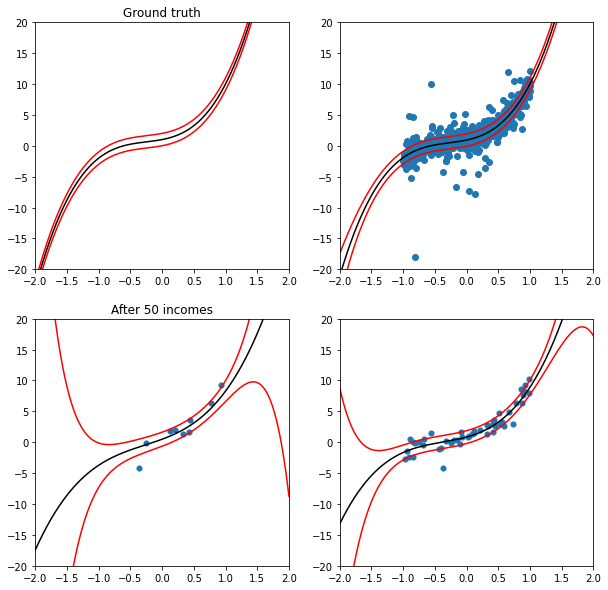

In [0]:
# 1000 linearly spaced numbers
test_num = 10000
x = np.linspace(-2,2,test_num)
y = np.zeros(test_num)

#fig1
plt.figure(figsize = [10,10])
axs1 = plt.subplot(2,2,1)
plt.axis([-2, 2, -20, 20])
axs1.title.set_text("Ground truth")
for i in range(n):
    y += w[i] * x**i
plt.plot(x,y,color = 'black')
plt.plot(x,y+a,color = 'red')
plt.plot(x,y-a,color = 'red')

#fig3
axs3 = plt.subplot(2,2,3)
axs3.title.set_text('After 10 incomes')
plt.axis([-2, 2, -20, 20])
y3 = np.zeros((test_num), dtype=float)
y3_up = np.zeros((test_num), dtype=float)
y3_down = np.zeros((test_num), dtype=float)
for i in range(test_num):
    data_x = np.array([x[i]**j for j in range(n)])
    data_var = 1/a + data_x.dot(ten_var).dot(data_x.T)
    y3[i] = data_x.dot(ten_mean) 
    y3_up[i] = y3[i] + np.asscalar(data_var)
    y3_down[i] = y3[i] - np.asscalar(data_var)
plt.plot(x,y3,color = 'black')
plt.plot(x,y3_up,color = 'red')
plt.plot(x,y3_down,color = 'red')
plt.scatter(ten_x,ten_y,linewidths=0.1)

#fig4
axs2 = plt.subplot(2,2,4)
axs3.title.set_text('After 50 incomes')
plt.axis([-2, 2, -20, 20])
y4 = np.zeros((test_num), dtype=float)
y4_up = np.zeros((test_num), dtype=float)
y4_down = np.zeros((test_num), dtype=float)
for i in range(test_num):
    data_x = np.array([x[i]**j for j in range(n)])
    data_var = 1/a + data_x.dot(fifty_var).dot(data_x.T)
    y4[i] = data_x.dot(fifty_mean) 
    y4_up[i] = y4[i] + np.asscalar(data_var)
    y4_down[i] = y4[i] - np.asscalar(data_var)
plt.plot(x,y4,color = 'black')
plt.plot(x,y4_up,color = 'red')
plt.plot(x,y4_down,color = 'red')
plt.scatter(fifty_x,fifty_y,linewidths=0.1)

#fig2
axs2 = plt.subplot(2,2,2)
axs3.title.set_text('After 50 incomes')
plt.axis([-2, 2, -20, 20])
y2 = np.zeros((test_num), dtype=float)
y2_up = np.zeros((test_num), dtype=float)
y2_down = np.zeros((test_num), dtype=float)
for i in range(test_num):
    data_x = np.array([x[i]**j for j in range(n)])
    data_var = 1/a + data_x.dot(posterior_var).dot(data_x.T)
    y2[i] = data_x.dot(posterior_mean) 
    y2_up[i] = y2[i] + np.asscalar(data_var)
    y2_down[i] = y2[i] - np.asscalar(data_var)
plt.plot(x,y2,color = 'black')
plt.plot(x,y2_up,color = 'red')
plt.plot(x,y2_down,color = 'red')
plt.scatter(train_x,train_y,linewidths=1)